In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from visualize import contour_with_quiver
from visualize import surf
from visualize import contour_with_path


xmin, xmax, xstep = -4.0, 4.0, 0.25  # xsteps -> xstep, ysteps -> ystep로 수정
ymin, ymax, ystep = -4.0, 4.0, 0.25  # xsteps -> xstep, ysteps -> ystep로 수정

x, y = np.meshgrid(np.arange(xmin, xmax+xstep, xstep),  # xsteps -> xstep로 수정
                   np.arange(ymin, ymax+ystep, ystep))  # ysteps -> ystep로 수정

f = lambda x, y: (x-2)**2 + (y-2)**2  # 람다 함수 정의를 수정

z = f(x, y)
minima = np.array([2., 2.])
f(*minima) # print 함수 추가하여 최소값 출력


0.0

[2. 2.] [[2.]
 [2.]]


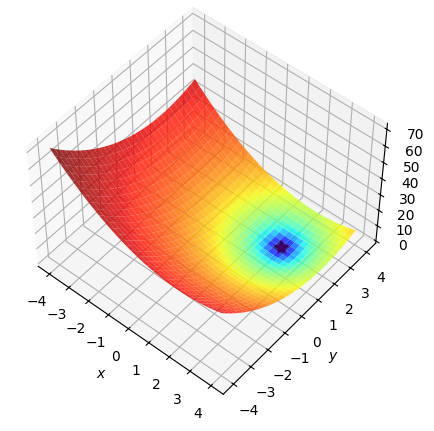

In [5]:
minima_ = minima.reshape(-1,1)
print(minima,minima_)
surf(f, x, y, minima=minima_)

/home/lee/visualize.py:18: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


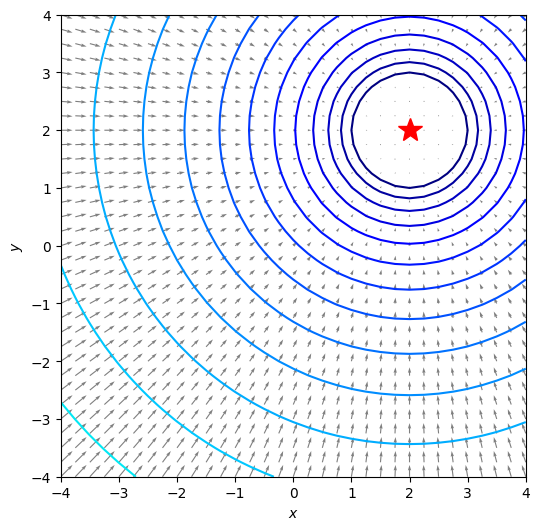

In [7]:
grad_f_x = lambda x, y: 2*(x-2)
grad_f_y = lambda x, y: 2*(y-2)

contour_with_quiver(f, x, y, grad_f_x, grad_f_y, minima=minima_)

In [8]:
def steepest_descent_twod(func, gradx, grady, x0, Maxiter=10, learning_rate = 0.25, verbose=True):
    paths = [x0]
    fval_paths = [f(x0[0], x0[1])]
    for i in range(Maxiter):
        grad = np.array([grad_f_x(*x0), grad_f_y(*x0)])
        x1 = x0 - learning_rate*grad
        fval = f(*x1)
        if verbose:
            print(i, x1, fval)
        x0 = x1
        paths.append(x0)
        fval_paths.append(fval)
    paths = np.array(paths)
    paths = np.array(np.matrix(paths).T)
    fval_paths = np.array(fval_paths)
    return(x0, fval, paths, fval_paths)

0 [0. 0.] 8.0
1 [1. 1.] 2.0
2 [1.5 1.5] 0.5
3 [1.75 1.75] 0.125
4 [1.875 1.875] 0.03125
5 [1.9375 1.9375] 0.0078125
6 [1.96875 1.96875] 0.001953125
7 [1.984375 1.984375] 0.00048828125
8 [1.9921875 1.9921875] 0.0001220703125
9 [1.99609375 1.99609375] 3.0517578125e-05


/home/lee/visualize.py:41: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(x, y, f(x,y), levels=level, norm=norm, cmap=plt.cm.jet)


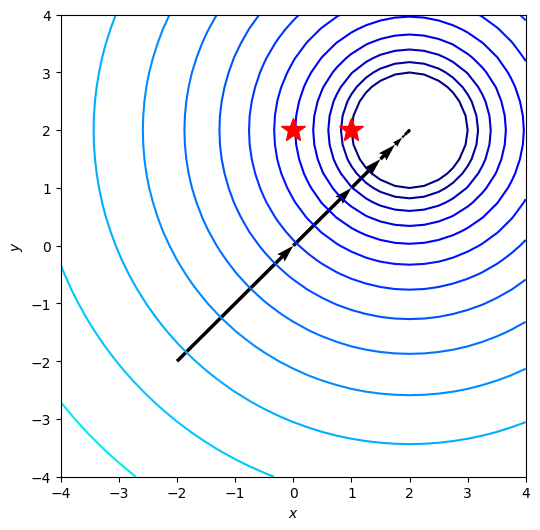

In [12]:
x0 = np.array([-2., -2.])
xopt, fopt, paths, fval_paths = steepest_descent_twod(f, grad_f_x, grad_f_y, x0)
contour_with_path(f, x, y, paths, minima=np.array([[2, 2]]))

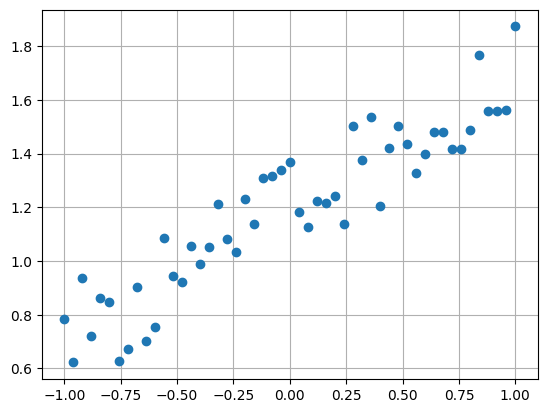

In [160]:
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5*x+1.0
y_train = f(x_train)+0.4*np.random.rand(len(x_train))
plt.plot(x_train, y_train, 'o')
plt.grid()
plt.show()

np.random.seed(303)
suffle_id = np.arange(0, len(x_train))
np.random.shuffle(suffle_id)  # 올바른 함수 이름으로 수정

x_train = x_train[suffle_id]
y_train = y_train[suffle_id]

def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i]) ** 2
    return val / N


def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i][0] + w[1] - y_set[i]  # x_set과 y_set의 원소에 접근하여 계산합니다.
        val += er * np.array([x_set[i][0], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    output_batches = []

    sample_size = len(features)
    for start_i in range(0, len(features), batch_size):
        end_i = start_i + batch_size
        batch_features = features[start_i:end_i]
        batch_labels = labels[start_i:end_i]
        batch = [batch_features, batch_labels]
        output_batches.append(batch)
    return output_batches

In [161]:
#SGD

batch_size = 10
lr =0.01
MaxEpochs = 51
alpha = 0.9

In [162]:
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr*grad
        w0 = w1

0 [ 4. -1.] 4.579314993864028


IndexError: invalid index to scalar variable.

In [163]:
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    if epoch % 10 == 0:
        print(epoch, w0, loss(w0, x_train, y_train))
    for x_batch, y_batch in generate_batches(batch_size,x_train,y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr*grad
        w1 = w0 + velocity
        w0 = w1

0 [ 4. -1.] 4.579314993864028


IndexError: invalid index to scalar variable.

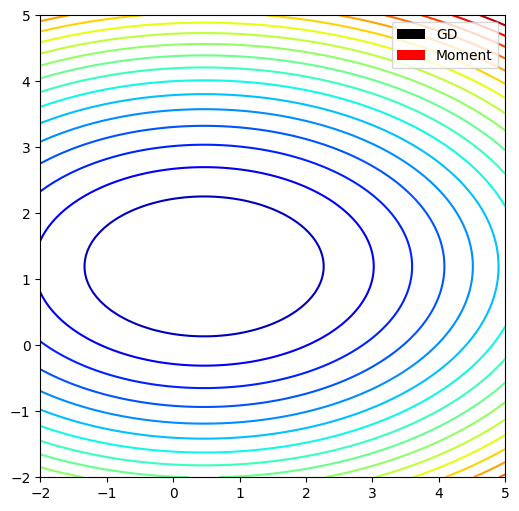

In [164]:
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)


fig, ax = plt.subplots(figsize=(6,6))

ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))
paths = path_sgd
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', scale=1, color='k')

paths = path_mm
paths = np.array(np.matrix(paths).T)
ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', scale=1, color='r')

plt.legend(['GD', 'Moment'])
plt.show()

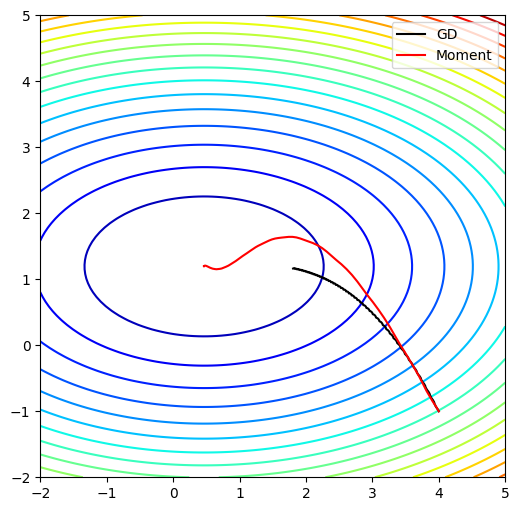

In [175]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i]) ** 2
    return val / N

# Gradient of the objective function
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]  
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    output_batches = []

    sample_size = len(features)
    for start_i in range(0, len(features), batch_size):
        end_i = start_i + batch_size
        batch_features = features[start_i:end_i]
        batch_labels = labels[start_i:end_i]
        batch = [batch_features, batch_labels]  # Modify this line to return batches as arrays
        output_batches.append(batch)
    return output_batches

# Generate some random data for demonstration
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5*x+1.0
y_train = f(x_train)+0.4*np.random.rand(len(x_train))

# Shuffling the data
np.random.seed(303)
shuffle_id = np.arange(0, len(x_train))
np.random.shuffle(shuffle_id)
x_train = x_train[shuffle_id]
y_train = y_train[shuffle_id]

# Parameters
batch_size = 10
lr = 0.01
MaxEpochs = 51
alpha = 0.9

# Gradient Descent Optimization
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr*grad
        w0 = w1

# Momentum Optimization
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr*grad
        w1 = w0 + velocity
        w0 = w1

# Plotting
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))

paths = np.array(path_sgd).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='k')

paths = np.array(path_mm).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='r')

plt.legend(['GD', 'Moment'])
plt.show()


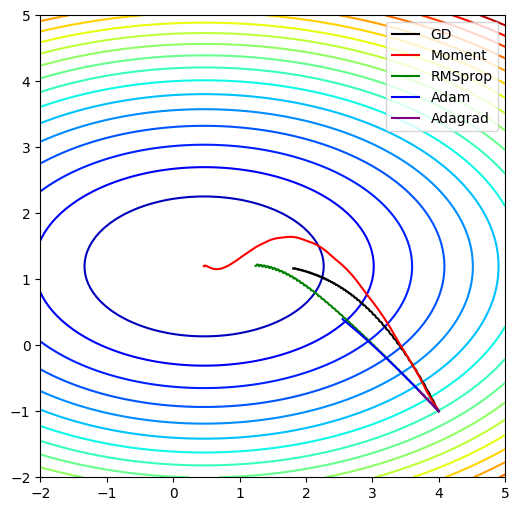

In [180]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * (w[0] * x_set[i] + w[1] - y_set[i]) ** 2
    return val / N

# Gradient of the objective function
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]  
        val += er * np.array([x_set[i], 1.0])
    return val / N

def generate_batches(batch_size, features, labels):
    """
    Create batches of features and labels
    :param batch_size: The batch size
    :param features: List of features
    :param labels: List of labels
    :return: Batches of (Features, Labels)
    """
    assert len(features) == len(labels)
    output_batches = []

    sample_size = len(features)
    for start_i in range(0, len(features), batch_size):
        end_i = start_i + batch_size
        batch_features = features[start_i:end_i]
        batch_labels = labels[start_i:end_i]
        batch = [batch_features, batch_labels]  # Modify this line to return batches as arrays
        output_batches.append(batch)
    return output_batches

# Generate some random data for demonstration
np.random.seed(320)
x_train = np.linspace(-1, 1, 51)
f = lambda x: 0.5*x+1.0
y_train = f(x_train)+0.4*np.random.rand(len(x_train))

# Shuffling the data
np.random.seed(303)
shuffle_id = np.arange(0, len(x_train))
np.random.shuffle(shuffle_id)
x_train = x_train[shuffle_id]
y_train = y_train[shuffle_id]

# Parameters
batch_size = 10
lr = 0.01
MaxEpochs = 51
alpha = 0.9
beta1 = 0.9  # Adam parameter
beta2 = 0.999  # Adam parameter
epsilon = 1e-8  # Adam parameter
delta = 1e-8  # Adagrad parameter

# Gradient Descent Optimization
w0 = np.array([4.0, -1.0])
path_sgd = []
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_sgd.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        w1 = w0 - lr*grad
        w0 = w1

# Momentum Optimization
w0 = np.array([4.0, -1.0])
path_mm = []
velocity = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_mm.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        velocity = alpha * velocity - lr*grad
        w1 = w0 + velocity
        w0 = w1

# RMSprop Optimization
w0 = np.array([4.0, -1.0])
path_rmsprop = []
cache = np.zeros_like(w0)
gamma = 0.9  # RMSprop parameter
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_rmsprop.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        cache = gamma * cache + (1 - gamma) * grad ** 2
        w1 = w0 - lr * grad / (np.sqrt(cache) + epsilon)
        w0 = w1

# Adam Optimization
w0 = np.array([4.0, -1.0])
path_adam = []
m = np.zeros_like(w0)
v = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adam.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        m = beta1 * m + (1 - beta1) * grad
        v = beta2 * v + (1 - beta2) * grad ** 2
        m_hat = m / (1 - beta1 ** (epoch + 1))
        v_hat = v / (1 - beta2 ** (epoch + 1))
        w1 = w0 - lr * m_hat / (np.sqrt(v_hat) + epsilon)
        w0 = w1

# Adagrad Optimization
w0 = np.array([4.0, -1.0])
path_adagrad = []
grad_square_sum = np.zeros_like(w0)
for epoch in range(MaxEpochs):
    for x_batch, y_batch in generate_batches(batch_size, x_train, y_train):
        path_adagrad.append(w0)
        grad = loss_grad(w0, x_batch, y_batch)
        grad_square_sum += grad ** 2
        w1 = w0 - lr * grad / (np.sqrt(grad_square_sum) + delta)
        w0 = w1

# Plotting
w0 = np.linspace(-2, 5, 101)
w1 = np.linspace(-2, 5, 101)
w0, w1 = np.meshgrid(w0, w1)
lossw = w0 * 0
for i in range(w0.shape[0]):
    for j in range(w0.shape[1]):
        wij = np.array([w0[i,j], w1[i,j]])
        lossw[i,j] = loss(wij, x_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))

ax.contour(w0, w1, lossw, cmap=plt.cm.jet, levels=np.linspace(0, np.max(lossw), 20))

paths = np.array(path_sgd).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='k')

paths = np.array(path_mm).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='r')

paths = np.array(path_rmsprop).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='g')

paths = np.array(path_adam).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='b')

paths = np.array(path_adagrad).T
ax.plot(paths[0], paths[1], marker='', linestyle='-', color='purple')  # 변경된 부분

plt.legend(['GD', 'Moment', 'RMSprop', 'Adam', 'Adagrad'])
plt.show()
